In [1]:
# import opensees.patch

In [2]:
# %run ColSectionOctIEu.py
from SectionLib import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
ft = 12.0

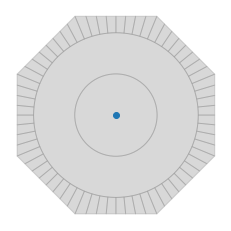

In [5]:
Dcol = 2*ft
cover = 2*inch
sect = Octagon(1,  Dcol,  8,  4,  3)
ax = render.section(sect)

In [6]:
print(sect.ixx)

18185.902812814857


## PART 2: Define damage state regions

In [7]:
DS = {
  # Any outermost cover fiber
  "dsr1" : [
      oct_outline(Dcol/2)
  ],
  # Any cover fiber at 1/2 - 3/4 cover depth
  "dsr3" : [
      #         internal radius         external radius
      oct_ring(Dcol/2-cover*(1-0.5), Dcol/2-cover*(1-0.75))
  ],
  "dsr2" : [
      oct_outline(Dcol/3)
  ],
}

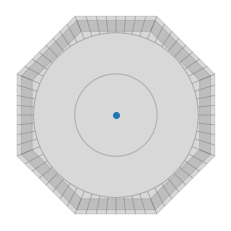

In [8]:
# add damage region to section that we're plotting
sect.fibers.extend(DS["dsr3"][0].fibers)
ax = render.section(sect)

## PART 3 - Filtering points by geometry

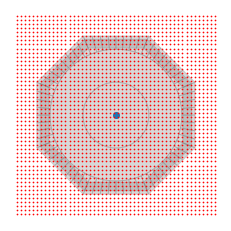

In [9]:
# Create grid of points
import numpy as np

grid = np.array([[x,y]
    for x in np.linspace(-15,15,50)
    for y in np.linspace(-15,15,50)
])
ax = render.section(sect)
ax.scatter(*list(zip(*grid)), color="red", s=0.5);

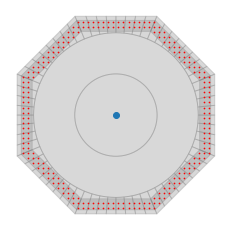

In [10]:
grid = [
    point for point in grid
    if point in DS["dsr3"][0]
]

ax = render.section(sect)
ax.scatter(*list(zip(*grid)), color="red", s=0.5);